In [1]:
import pandas as pd
import numpy as np

In [2]:
teams = pd.read_csv("teams.csv")

In [3]:
teams

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


In [4]:
X = teams[["athletes", "prev_medals"]].copy()
y = teams[["medals"]].copy()

In [5]:
X

,athletes,prev_medals
0,8,0.0
1,5,0.0
2,8,0.0
3,11,0.0
4,5,0.0
...,...,...
2009,26,0.0
2010,14,0.0
2011,16,3.0
2012,9,4.0


In [6]:
y

,medals
0,0
1,0
2,0
3,0
4,0
...,...
2009,0
2010,3
2011,4
2012,0


In [9]:
X["intercept"] = 1


In [10]:
X

,athletes,prev_medals,intercept
0,8,0.0,1
1,5,0.0,1
2,8,0.0,1
3,11,0.0,1
4,5,0.0,1
...,...,...,...
2009,26,0.0,1
2010,14,0.0,1
2011,16,3.0,1
2012,9,4.0,1


In [14]:
#Transpose of data by Pandas
X.T

,0,1,2,3,4,5,6,7,8,9,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
athletes,8.0,5.0,8.0,11.0,5.0,4.0,6.0,3.0,4.0,5.0,...,52.0,20.0,47.0,28.0,21.0,26.0,14.0,16.0,9.0,31.0
prev_medals,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0


In [49]:
B = np.linalg.inv(X_T @ X) @ X_T @ y

In [52]:
B

,medals
0,-1.961889
1,0.071112
2,0.734137


In [53]:
B.index = X.columns

In [54]:
B

,medals
intercept,-1.961889
athletes,0.071112
prev_medals,0.734137


In [55]:
predictions = X @ B

In [56]:
predictions

,medals
0,-1.392992
1,-1.606329
2,-1.392992
3,-1.179656
4,-1.606329
...,...
2009,-0.112974
2010,-0.966319
2011,1.378315
2012,1.614667


In [57]:
SSR = ((y - predictions) ** 2).sum()

In [65]:
TSS = ((y - y.mean()) ** 2).sum()

In [58]:
SSR

medals    290620.124598
dtype: float64

In [66]:
TSS

medals    2.276322e+06
dtype: float64

In [67]:
R2 = 1 - (SSR / TSS)

In [68]:
R2

medals    0.872329
dtype: float64

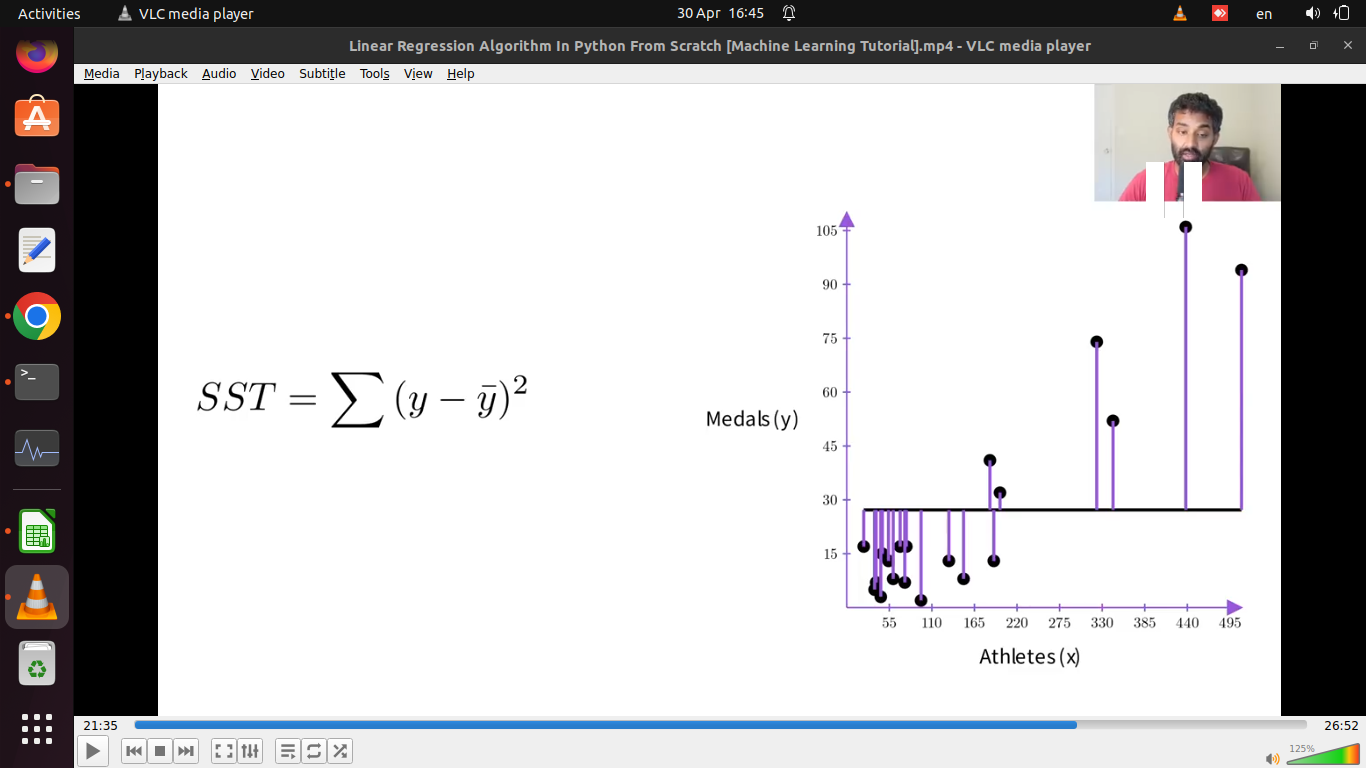

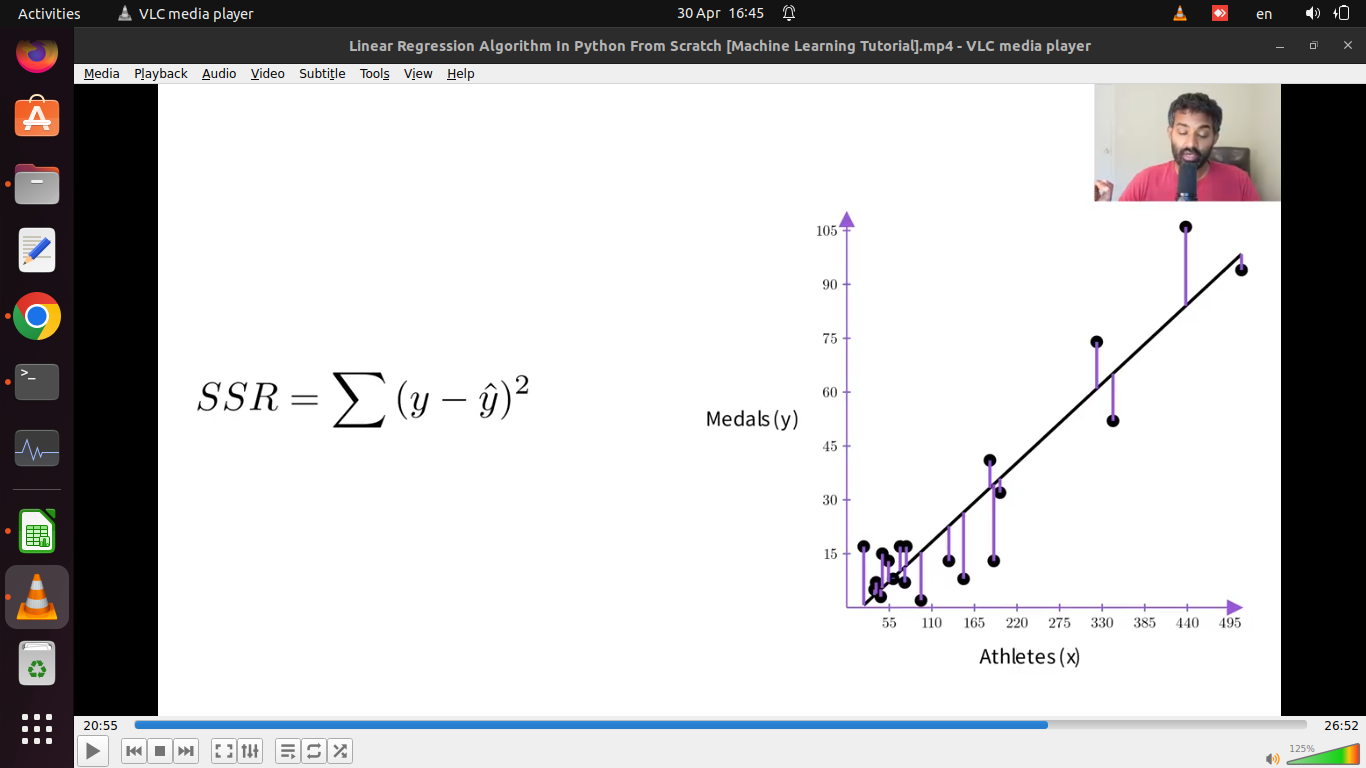

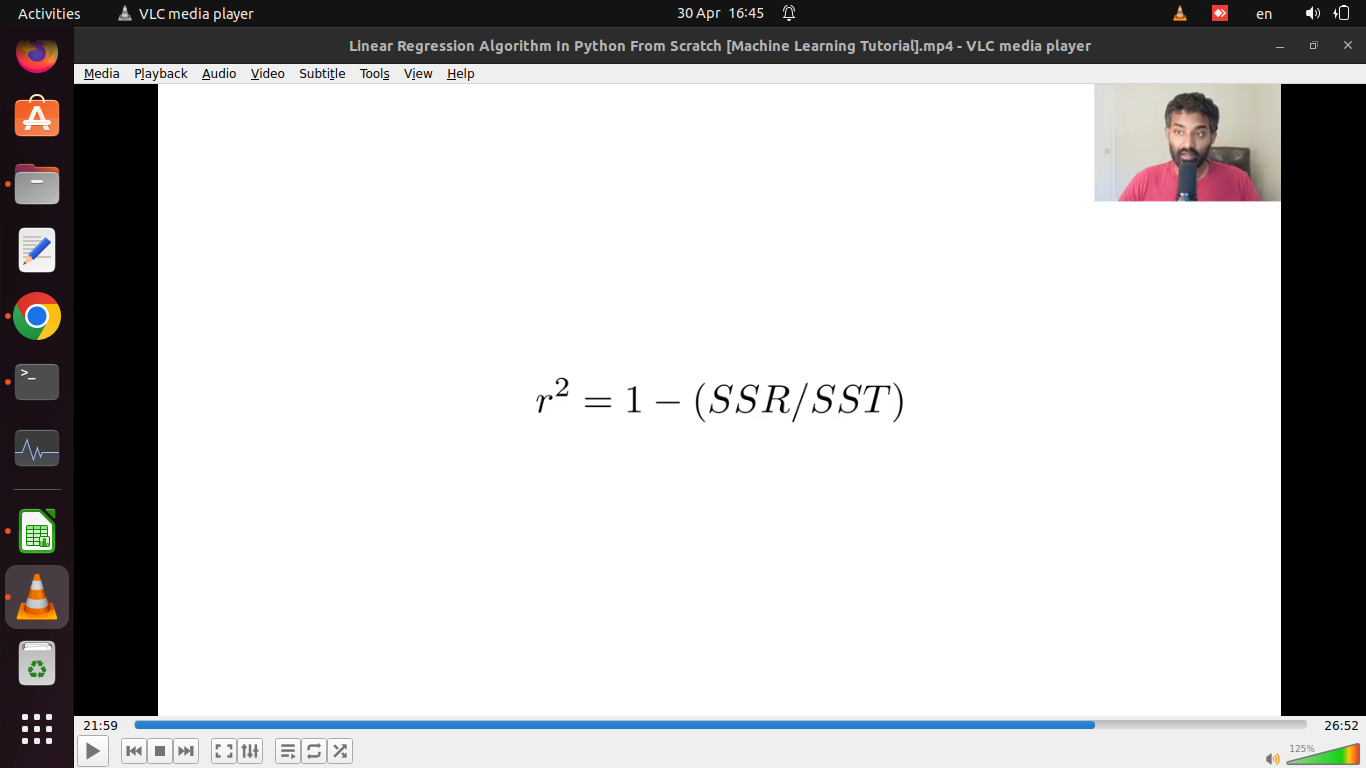

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#initial linear regression algorithm 
lr = LinearRegression()

In [21]:
# Melanee:
lr.fit(X,y)

LinearRegression()

In [22]:
#lr.fit(teams[["athletes", "prev_medals"]], teams[["medals"]])

LinearRegression()

In [23]:
#output sanm as line 54
lr.intercept_

array([-1.96188939])

In [25]:
#output sanm as line 54
lr.coef_

array([[0.07111214, 0.73413679]])